### - AirBnB NYC: Group Case Study

In [5]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import urllib
%matplotlib inline

In [6]:
#Importing the csv file

abnb_nyc = pd.read_csv('AB_NYC_2019.csv')
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',100)
abnb_nyc.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [7]:
abnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#Checking the dataframe

abnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#Checking for null values by columns
#We chose to ignore the null values as they as insignificant

abnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#In the columns 'reviews_per_month' we'll be replacing the NaN with 0, indicating that the listing has not recieved any reviews
abnb_nyc.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
#Dropping insignificant columns

abnb_nyc.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [12]:
abnb_nyc

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [13]:
#Type of hosts using room type distribution

abnb_nyc['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [14]:
#Creating a new dataset called room_type_dist

room_type_dist = abnb_nyc[['room_type','host_id']].groupby(['room_type']).count().reset_index()
room_type_dist.columns=['room_type','count']

room_type_dist['Percent']=(room_type_dist['count']/room_type_dist['count'].sum())*100

In [15]:
room_type_dist

,room_type,count,Percent
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


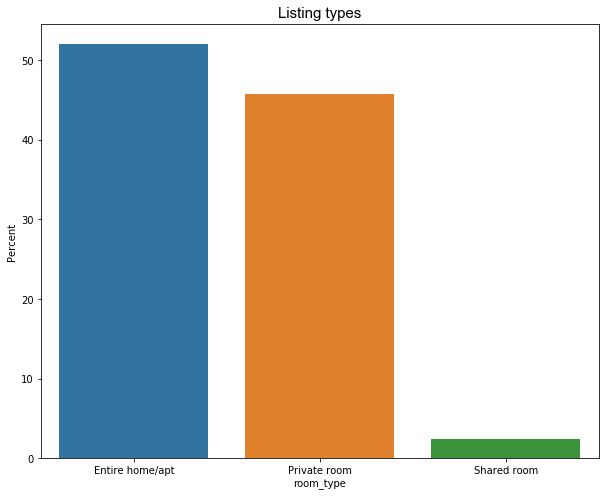

In [16]:
#Visualising room_type_dist using a barplot

plt.figure(figsize = (10,8))

sns.barplot(room_type_dist['room_type'],room_type_dist['Percent'])

plt.title('Listing types', fontdict = {'fontname':'Arial', 'fontsize':15})

plt.show()

#### - As we can see from the above barplot, more than half of all listing types are 'Entire home/apt'

In [17]:
#Creating a new dataset called neighbourhood_group_dist

neighbourhood_group_dist = abnb_nyc[['neighbourhood_group','host_id']].groupby(['neighbourhood_group']).count().reset_index()
neighbourhood_group_dist.columns=['neighbourhood_group','count']

neighbourhood_group_dist['Percent']=(neighbourhood_group_dist['count']/neighbourhood_group_dist['count'].sum())*100

In [18]:
neighbourhood_group_dist

,neighbourhood_group,count,Percent
0,Bronx,1091,2.231312
1,Brooklyn,20104,41.116679
2,Manhattan,21661,44.301053
3,Queens,5666,11.588097
4,Staten Island,373,0.762859


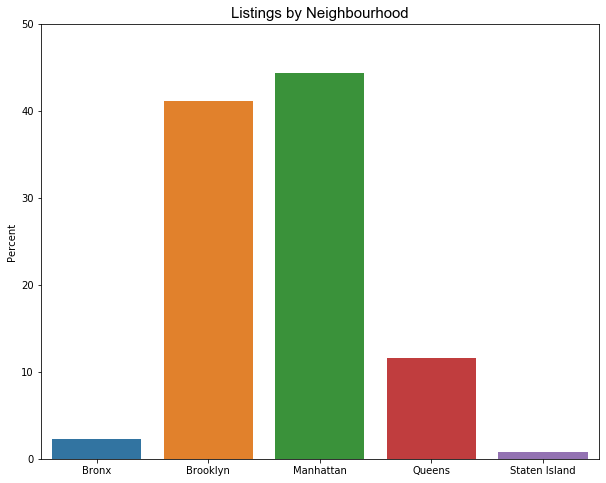

In [19]:
#Visualising neighbourhood_group_dist using a barplot

plt.figure(figsize = (10,8))

sns.barplot(neighbourhood_group_dist['neighbourhood_group'],neighbourhood_group_dist['Percent'])

plt.title('Listings by Neighbourhood', fontdict = {'fontname':'Arial', 'fontsize':15})

plt.xlabel(None)
plt.yticks([0,10,20,30,40,50])

plt.show()

#### - Based the above barplot maximum number of listings come from the neighbourhood of Manhattan.

In [20]:
#Determining the most preferred neighbourhood

abnb_nyc['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [21]:
#Creating a new dataset called neighbourhood_dist

neighbourhood_dist = abnb_nyc[['neighbourhood','host_id']].groupby(['neighbourhood']).count().reset_index()
neighbourhood_dist.columns=['neighbourhood','count']

neighbourhood_dist['Percent']=(neighbourhood_dist['count']/neighbourhood_dist['count'].sum())*100

In [22]:
neighbourhood_dist = neighbourhood_dist.sort_values(by = 'count', ascending = False).head(10).reset_index()

In [23]:
neighbourhood_dist['Percent'] = (neighbourhood_dist['count']/neighbourhood_dist['count'].sum())*100

In [24]:
neighbourhood_dist.drop('index', axis = 1, inplace = True)

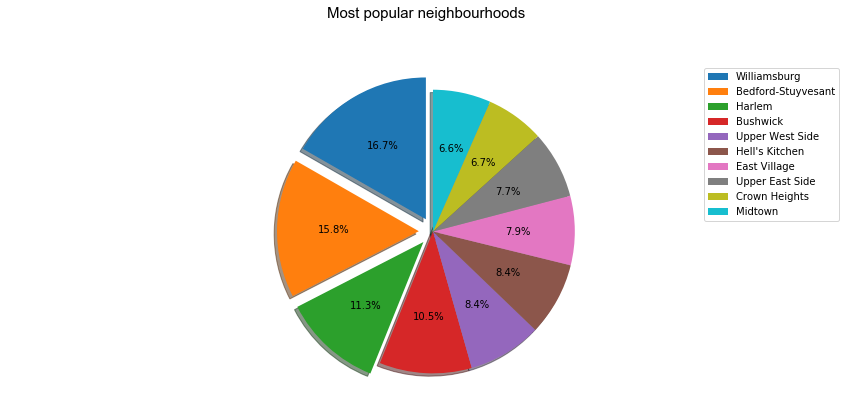

In [25]:
#Visualising the most popular neighbourhoods based on the number of listings

neighbourhood_dist['count'].plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,shadow=True,labels=None,explode=[0.1,0.1,0.1,0,0,0,0,0,0,0])

plt.title('Most popular neighbourhoods',y=1.12, fontdict = {'fontname':'Arial', 'fontsize':15})

plt.axis('equal')
plt.ylabel(None)
plt.legend(labels = neighbourhood_dist['neighbourhood'])

plt.show()

In [26]:
#Creating a subset for price less than 500

avg_price_range = abnb_nyc[abnb_nyc.price < 500]

avg_price_range

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [27]:
#Calculating the average price for listings by neighbourhood_group

avg_price_range = avg_price_range.groupby(['neighbourhood_group']).mean()
avg_price_range = avg_price_range['price']
avg_price_range = pd.DataFrame({'Neighbourhood': avg_price_range.index,'Price': avg_price_range.values})
avg_price_range.set_index('Neighbourhood')

,Price
Neighbourhood,
Bronx,80.969501
Brooklyn,111.651248
Manhattan,161.106379
Queens,92.344583
Staten Island,91.144414


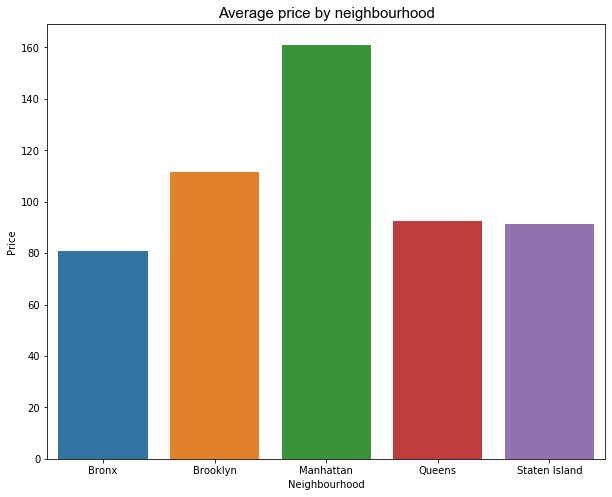

In [28]:
#Visualising average price by neighbourhood

plt.figure(figsize = (10,8))

sns.barplot(avg_price_range.Neighbourhood, avg_price_range['Price'])

plt.title('Average price by neighbourhood', fontdict = {'fontname':'Arial', 'fontsize':15})

plt.show()

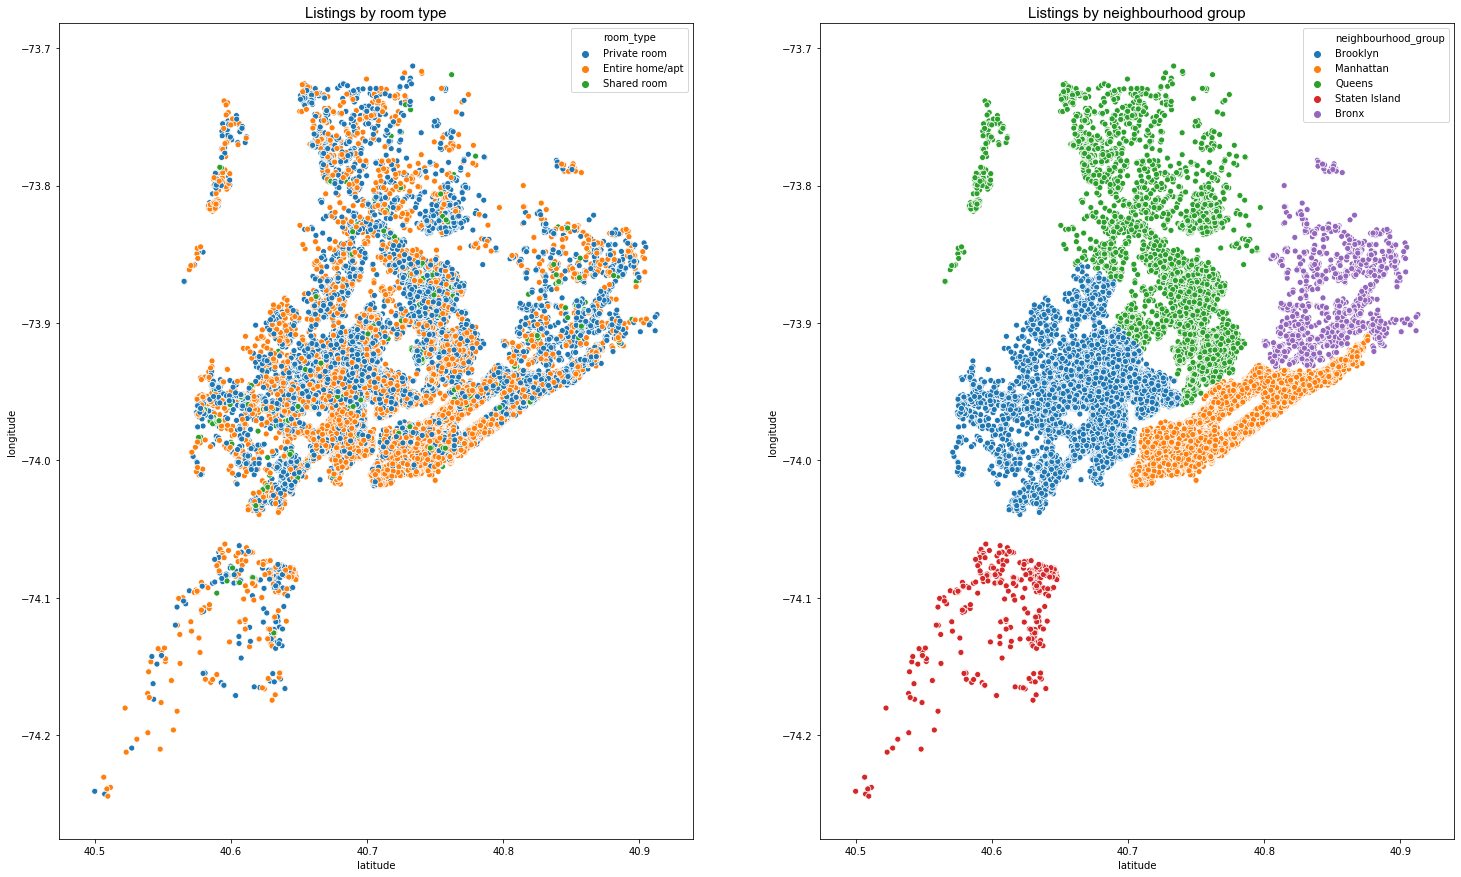

In [29]:
#Room type by neighbourhood

plt.figure(figsize = (25,15))

plt.subplot(1,2,1)
sns.scatterplot(x = 'latitude', y = 'longitude', data = abnb_nyc, hue = 'room_type')

plt.legend()
plt.title('Listings by room type', fontdict = {'fontname':'Arial', 'fontsize':15})

plt.subplot(1,2,2)
sns.scatterplot(x = 'latitude', y = 'longitude', data = abnb_nyc, hue = 'neighbourhood_group')

plt.legend()
plt.title('Listings by neighbourhood group', fontdict = {'fontname':'Arial', 'fontsize':15})


plt.show()

In [30]:
#Checking which host has the most listings


top_host_listings = abnb_nyc.host_id.value_counts().head(10)
top_host_listings = pd.DataFrame(top_host_listings)
top_host_listings.reset_index(inplace=True)
top_host_listings.rename(columns={'index':'host_Id', 'host_id':'Count'}, inplace=True)
top_host_listings

,host_Id,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


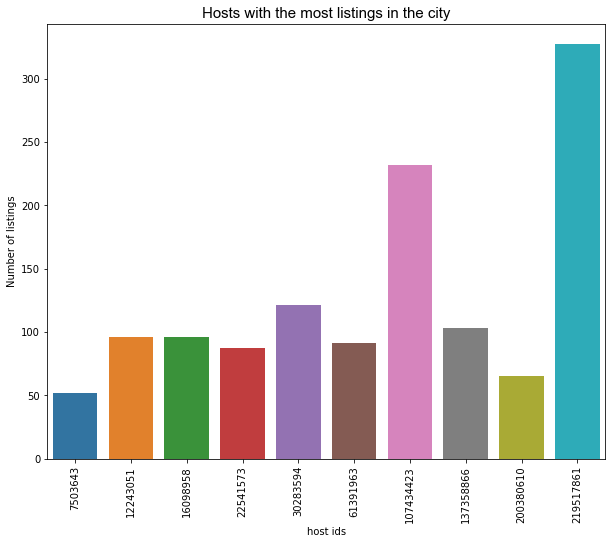

In [31]:
#Visualising which host has the most listings using 

plt.figure(figsize=(10,8))

sns.barplot(x = 'host_Id', y = 'Count', data = top_host_listings, palette = 'tab10')

plt.title('Hosts with the most listings in the city', fontdict = {'fontname':'Arial', 'fontsize':15})

plt.ylabel('Number of listings')
plt.xlabel('host ids')

plt.xticks(rotation = 'vertical')

plt.show()

In [32]:
#Which room_type gets the most reviews

abnb_nyc.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
Name: number_of_reviews, dtype: float64

In [33]:
#Creating a dataframe based on above info

data_1 = {'room_type': ['Entire home/apt','Private room','Shared room'], 'Avg_Rating' : [22.84,24.11,16.60]}

avg_rating = pd.DataFrame(data = data_1)

avg_rating

,room_type,Avg_Rating
0,Entire home/apt,22.84
1,Private room,24.11
2,Shared room,16.60


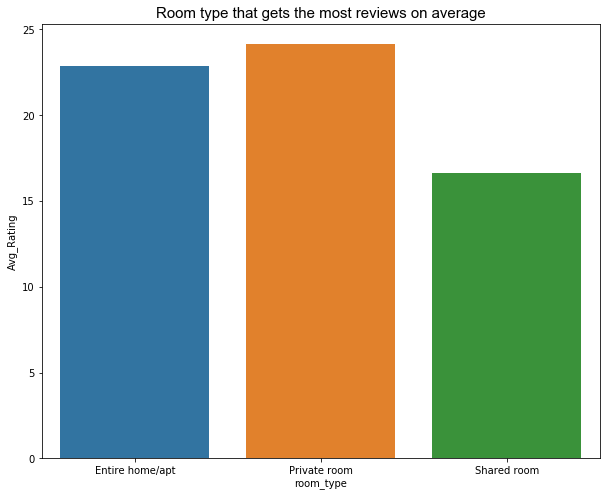

In [34]:
#Visualisation of Which room_type gets the most reviews

plt.figure(figsize = (10,8))

sns.barplot(avg_rating.room_type, avg_rating['Avg_Rating'])

plt.title('Room type that gets the most reviews on average', fontdict = {'fontname':'Arial', 'fontsize':15})

plt.show()

In [35]:
#Room_type by availability and neighbourhood_group

data_2 = {'room_type': ['Entire home/apt','Private room','Shared room'], 'Avg_Rating' : [22.84,24.11,16.60]}

avg_rating = pd.DataFrame(data = data_2)

avg_rating

,room_type,Avg_Rating
0,Entire home/apt,22.84
1,Private room,24.11
2,Shared room,16.60


In [ ]:
#Visualising